In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('doctor_fees.csv')
data1=pd.read_csv('doctor_fees_eval.csv')

In [7]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [8]:
data1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
data.describe(include='object')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,2659,5936,5961,3341
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,684,75,1397,40


In [11]:
data.shape

(5961, 7)

In [12]:
data.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [13]:
### experiecnce columns change  to int and split C& N
data['Experience']=data['Experience'].str.split().str[0]
data['Experience']=data['Experience'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int32 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 302.8+ KB


In [15]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [16]:
 #### in place coumns  fill the null values
data['Place'].fillna('unknow',inplace=True)

In [17]:
data.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [18]:
#### place colums split into locality and city
data['locality']=data['Place'].str.split(",").str[0]
data['city']=data['Place'].str.split(",").str[1]

In [19]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [20]:
data.drop('Place',axis=1,inplace=True)    #### place column is drop

In [21]:
data.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [22]:
data['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
57%       3
72%       3
62%       2
64%       2
55%       2
33%       2
63%       2
36%       1
7%        1
48%       1
40%       1
45%       1
65%       1
47%       1
58%       1
53%       1
Name: Rating, dtype: int64

In [23]:
### rating columns  null  is fill with '-1'
data['Rating'].fillna('-1%',inplace=True)

In [24]:
data.isna().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
locality                 0
city                    26
dtype: int64

In [25]:
 data['Rating']=data['Rating'].str.slice(stop=-1).astype(int)

In [26]:
data.head(10)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-1,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,-1,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
5,BAMS,8,-1,Ayurveda,NaN,100,Porur,Chennai
6,BHMS,42,-1,Homeopath,NaN,200,Karol Bagh,Delhi
7,BDS,10,99,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,Arekere,Bangalore
8,"MBBS, MD - General Medicine",14,-1,General Medicine,NaN,100,Old City,Hyderabad
9,"BSc, BDS",23,-1,Dentist,NaN,100,Athani,Ernakulam


In [27]:
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
data['Rating']=pd.cut(data['Rating'],bins=bins,labels=labels,include_lowest=True)

In [28]:
data['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [29]:
data['Qualification'].value_counts()

BDS                                                                                                                           488
BHMS                                                                                                                          477
BAMS                                                                                                                          471
MBBS                                                                                                                          334
MBBS, MS - ENT                                                                                                                220
                                                                                                                             ... 
MBBS, F.C.I.P                                                                                                                   1
BAMS, PG Diploma in Panchakarma                                                           

In [30]:
data.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile',
       'Miscellaneous_Info', 'Fees', 'locality', 'city'],
      dtype='object')

In [31]:
##### Qualification

data['Qualification_count']=data['Qualification'].apply(lambda x:len(x.split(",")))
data['Qualification_count'].value_counts()   ### no.of  Qualification 

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [32]:
data[data['Qualification']==10]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,Qualification_count


In [33]:
data[data['Qualification']==8]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,Qualification_count


In [34]:
data['Qualification'].nunique()

1420

In [35]:
data['Qualification']=data['Qualification'].str.split(",")

Qualification={}
for x in data['Qualification'].values:
    for qual in x:
        qual=qual.strip()
        if qual in Qualification:
            Qualification[qual]+=1
        else:
            Qualification[qual]=1

In [36]:
print( Qualification)   ### no.of degrees  find out

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [37]:
top_ten=sorted( Qualification.items(),key=lambda x:x[1],reverse=True)[:10]

final_qual=[]

for qual in top_ten:
    final_qual.append(qual[0])

In [38]:
print(final_qual)    ### consider only  top10 

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [39]:
for qual in final_qual:
    data[qual]=0
    
for x,y in zip(data['Qualification'].values,np.array([i for i in range(len(data))])):
    for z in x:
        z=z.strip()
        if z in final_qual:
            data[z][y]=1

C:\Users\srava\AppData\Local\Temp\ipykernel_26048\140915637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[z][y]=1


In [40]:
data.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,Qualification_count,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,2,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,2,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,2,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,2,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1,0,0,1,0,0,0,0,0,0,0


In [41]:
data.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [42]:
data.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees',
       'locality', 'city', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology',
       'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [43]:
data['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: city, dtype: int64

In [44]:
import re     ## find out no of doctor in  city wise

In [45]:
data['city']=data['city'].apply(lambda x:re.sub(r'\+',"",str(x)))
data['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
nan                      26
 Sector 5                 1
Name: city, dtype: int64

In [46]:
data['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'nan',
       ' Sector 5'], dtype=object)

In [47]:
 ## city =sector5  change into city =nan
data[(data['city'] == 'Sector5') | (data['city'] == 'nan')]


,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
91,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
502,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
599,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
605,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
724,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
1002,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
1083,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
1210,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
2078,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
2178,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0


In [48]:
data['city']=np.where(data['city'] == 'Sector5','Delhi',data['city'])

In [49]:
data[(data['city'] == 'nan')]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
91,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
502,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
599,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
605,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
724,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
1002,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
1083,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
1210,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
2078,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0
2178,0,0,Dermatologists,NaN,100,unknow,nan,0,0,0,0,0,0,0,0,0,0


In [50]:
data['city']=np.where(data['city'] == 'nan','unknow',data['city'])

In [51]:
 data['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
unknow                   26
 Sector 5                 1
Name: city, dtype: int64

In [52]:
data.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [53]:
data.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees',
       'locality', 'city', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology',
       'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

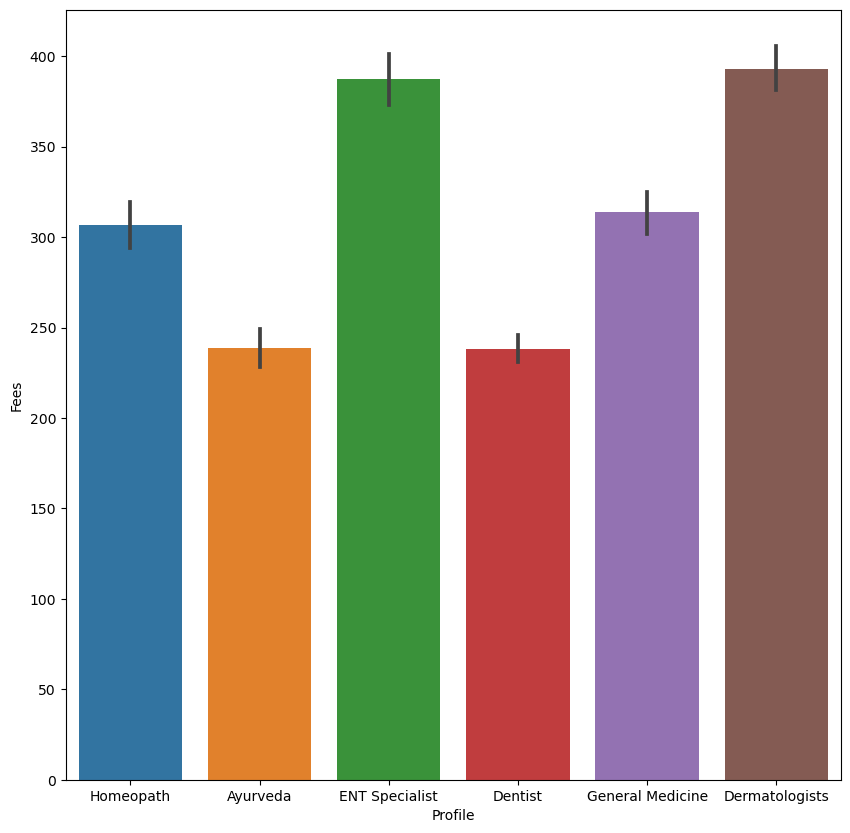

In [54]:

plt.figure(figsize=(10,10))
sns.barplot(x='Profile',y='Fees',data=data)
plt.show()

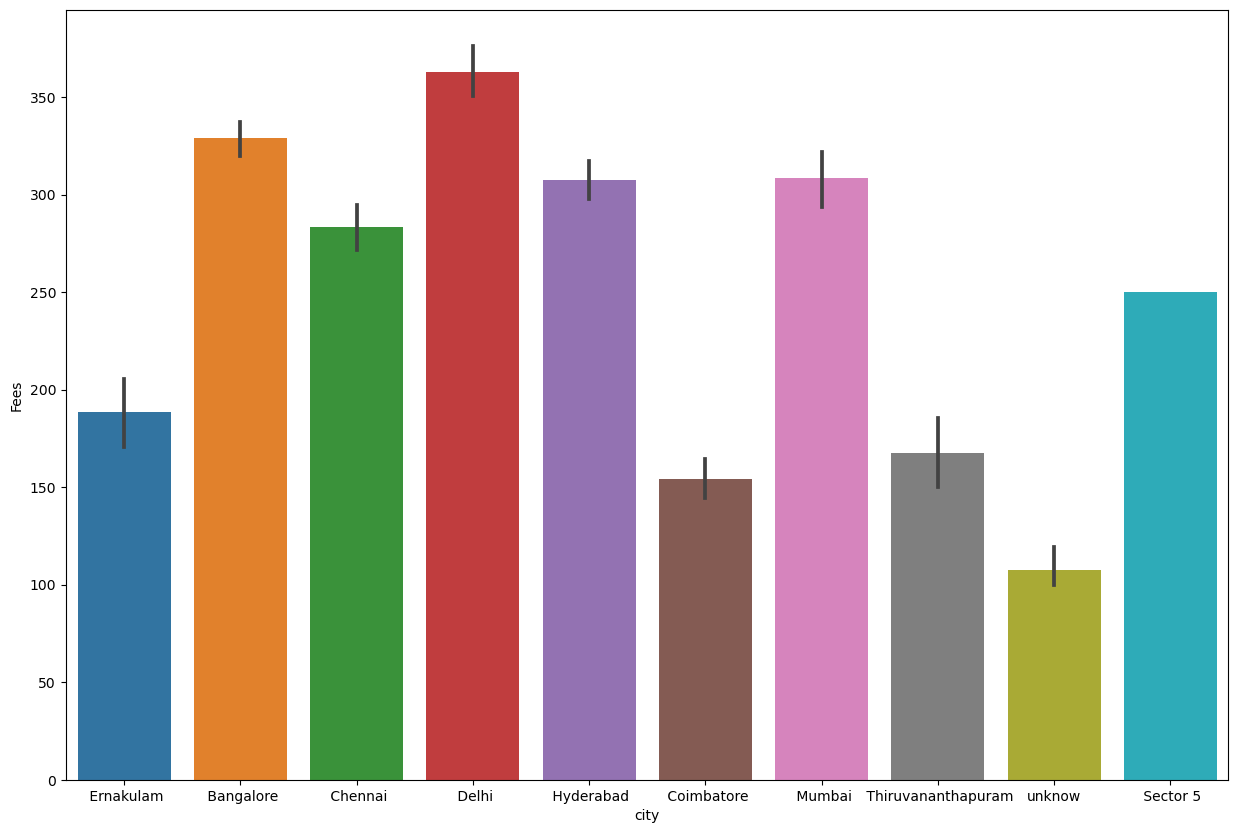

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x='city',y='Fees',data=data)
plt.show()

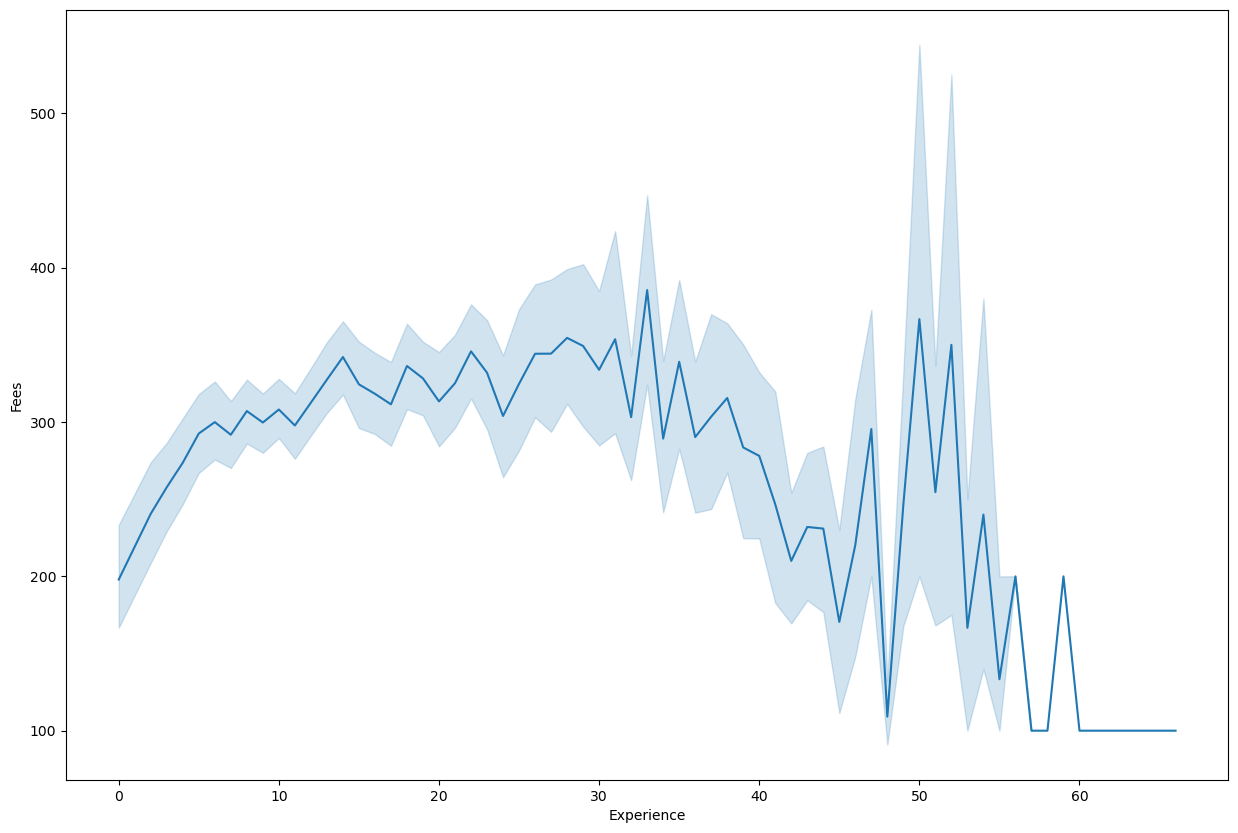

In [56]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Experience',y='Fees',data=data)
plt.show()

In [57]:
data.head(3)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0


In [58]:
data=pd.get_dummies(data,columns=["city","Profile"],prefix=["city","Profile"])

In [59]:
data.head(3)

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,city_ Mumbai,city_ Sector 5,city_ Thiruvananthapuram,city_unknow,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
data.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'},inplace=True)

In [61]:
data

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD_Dermatology,...,city_ Mumbai,city_ Sector 5,city_ Thiruvananthapuram,city_unknow,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,NaN,100,Nungambakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,General Medical Consultation Viral Fever Treat...,100,Vileparle West,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [62]:
data.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [63]:
data.head(3)

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,city_ Mumbai,city_ Sector 5,city_ Thiruvananthapuram,city_unknow,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
### divided  x ,y variables


x=data.drop('Fees',axis=1)
y=data['Fees']

In [65]:
x

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,MD_General_Medicine,...,city_ Mumbai,city_ Sector 5,city_ Thiruvananthapuram,city_unknow,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [66]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [69]:
x_train.shape

(4768, 28)

In [70]:
x_test.shape

(1193, 28)

In [71]:
y_train.shape

(4768,)

In [72]:
y_test.shape

(1193,)

In [73]:
###### MODEL BUILDING
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer


In [74]:
def r_score1(y_pred,y):
    
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = r_score1, greater_is_better=True)

In [75]:
KNN_reg = KNeighborsRegressor()
SVR_reg = SVR()
RAN_reg = RandomForestRegressor()

In [77]:
for reg in (KNN_reg, SVR_reg, RAN_reg):
    reg.fit(x_train,y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, r_scorer1(y_pred,y_test))

NameError: name 'r_scorer1' is not defined